In [1]:
import numpy as np
import matplotlib.pyplot as plt

# define KRR class and formula explanation

## KRR class

**lambda_** defines the hyperparameter $\lambda$   
**sigma** defines the hyperparameter $\sigma$   
kernel can be 'Linear' or 'Gaussian'   
use method **fit(X, y)** to train a model   
 - X: size (N, p), N data, p dimension  
 - y: size (N, 1), N data  
 - you can use **arr.reshape(-1, 1)** to reshape y variable  
 
ues method **predict(X)** to make prediction with given X  
 - return y: size (N, 1) 


## training formula:

$$ \alpha = (K + \lambda I)^{-1} \boldsymbol{y} $$  
the size of $\alpha$ is: (N, 1)  
where K is $K=k(x_i, x_j)$,  
I is the identity matrix with the same size with K  
y is the target value, size (N, 1)  


## prediction formula:

$$ y^{*} = K^{*} \alpha  $$  
$K^{*}$ is the kernel matrix $K(x_{test}, x_{train})$  
the result $y^{*}$ is the has the size (N_test, 1)  


In [2]:
class KRR():
    def __init__(self, kernel='Linear', lambda_=0.1, **kw):
        self.kernel = getattr(self, kernel)
        self.params = {'lambda': lambda_, 'sigma': 0.01}
        for k, v in kw.items():
            self.params[k] = v
        self.train_x = None
        self.alpha = None
    
    def Linear(self, x1, x2):
        return x1 @ x2.T
    
    def Gaussian(self, x1, x2):
        dist = np.sum(x1**2, 1).reshape(-1, 1) \
               + np.sum(x2**2, 1) \
               - 2*np.dot(x1, x2.T)
        return np.exp(-0.5 * dist / (self.params['sigma']**2))
    
    def fit(self, X, y):
        self.train_x = np.asarray(X)
        self.train_y = np.asarray(y).reshape(-1, 1)
        K = self.kernel(self.train_x, self.train_x)
        self.alpha = np.linalg.inv(K + self.params['lambda'] * np.eye(len(self.train_x))) @ self.train_y
    
    def predict(self, X):
        self.pred_x = np.asarray(X)
        K = self.kernel(self.pred_x, self.train_x)
        return K @ self.alpha

# Training KRR with the linear kernel

In [3]:
# load FCI 20 points data for H2
x = np.loadtxt('R_20.dat')
y = np.loadtxt('E_FCI_20.dat')

In [4]:
x, y # let's check the data

(array([0.5 , 0.73, 0.97, 1.21, 1.44, 1.68, 1.92, 2.15, 2.39, 2.63, 2.86,
        3.1 , 3.34, 3.57, 3.81, 4.05, 4.28, 4.52, 4.76, 5.  ]),
 array([-1.1041324 , -1.1742703 , -1.1523302 , -1.1122911 , -1.0763637 ,
        -1.04709854, -1.0269981 , -1.01498208, -1.00778427, -1.00394841,
        -1.00204266, -1.00102643, -1.00052105, -1.0002772 , -1.00014714,
        -1.0000809 , -1.00004767, -1.00002852, -1.00001888, -1.00001171]))

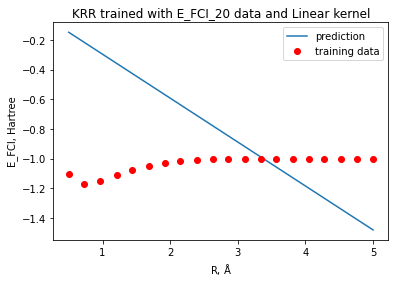

In [5]:
# define a KRR model with linear kernel.
krr = KRR(kernel='Linear', lambda_=0.000001)  
# fit train this model with data
krr.fit(x.reshape(-1, 1), y.reshape(-1, 1))

# make prediction, 100 points ranging from 0.5 to 5
test_x = np.linspace(0.5, 5, 100) 
test_y = krr.predict(test_x.reshape(-1, 1))

# plot the result
plt.plot(test_x, test_y.ravel(), label='prediction')
plt.plot(x, y, 'ro', label='training data')
plt.title('KRR trained with E_FCI_20 data and Linear kernel')
plt.xlabel('R, $\mathrm{\AA}$'); plt.ylabel('E_FCI, Hartree')
plt.legend()

# Training KRR with the Gaussian kernel

In [6]:
# load data with FCI 451 points for H2
x = np.loadtxt('R_451.dat')
y = np.loadtxt('E_FCI_451.dat')
# load the index for train and test data set
train_idx = np.loadtxt('itrain.dat', dtype=np.int64) - 1
test_idx = np.loadtxt('itest.dat', dtype=np.int64) - 1

In [7]:
train_idx, test_idx # let's check the index

(array([  0,  23,  47,  71,  94, 118, 142, 165, 189, 213, 236, 260, 284,
        307, 331, 355, 378, 402, 426, 450]),
 array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
         41,  42,  43,  44,  45,  46,  48,  49,  50,  51,  52,  53,  54,
         55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
         68,  69,  70,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
         82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  95,
         96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
        109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 120, 121, 122,
        123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
        136, 137, 138, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149,
        150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162,
      

In [8]:
# get train & test data through index
train_x, train_y = x[train_idx], y[train_idx]
test_x, test_y = x[test_idx], y[test_idx]

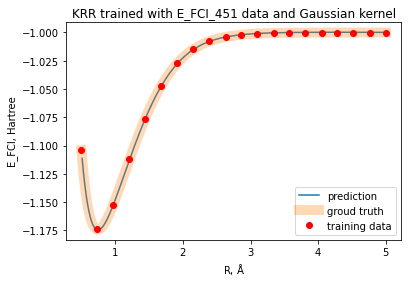

In [9]:
# define a KRR model with linear kernel, and trian it
krr = KRR(kernel='Gaussian', sigma=1, lambda_=3.5e-13)
krr.fit(train_x.reshape(-1, 1), train_y.reshape(-1, 1))

# make prediction
pred_y = krr.predict(test_x.reshape(-1, 1))

# plot the result
plt.plot(test_x, pred_y.ravel(), label='prediction')
plt.plot(x, y, lw=10, alpha=0.3, label='groud truth')
plt.plot(train_x, train_y, 'ro', label='training data')
plt.title('KRR trained with E_FCI_451 data and Gaussian kernel')
plt.xlabel('R, $\mathrm{\AA}$'); plt.ylabel('E_FCI, Hartree')
plt.legend()